In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#engine measurement
engine.execute('SELECT * FROM measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
#engine and inspect station
engine.execute('SELECT * FROM station limit 10').fetchall()
inspector = inspect(engine)
columns = inspector.get_columns('station')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
#inspect measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [13]:
#column names prettier with type
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
end_date = session.query(Measurement).order_by((Measurement.date).desc()).limit(1)
for data in end_date:
     print(data.date)       
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

2017-08-23


datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement).filter(Measurement.date >= year_ago).order_by((Measurement.date).desc()).all()
for data in year_data:
     print(data.date, data.prcp)

2017-08-23 0.0
2017-08-23 0.0
2017-08-23 0.08
2017-08-23 0.45
2017-08-22 0.0
2017-08-22 0.0
2017-08-22 0.5
2017-08-21 0.0
2017-08-21 0.02
2017-08-21 None
2017-08-21 0.56
2017-08-20 0.0
2017-08-20 0.01
2017-08-20 None
2017-08-19 0.0
2017-08-19 0.0
2017-08-19 None
2017-08-19 0.09
2017-08-18 0.0
2017-08-18 0.0
2017-08-18 0.06
2017-08-18 None
2017-08-17 0.0
2017-08-17 0.05
2017-08-17 0.01
2017-08-17 0.13
2017-08-16 0.0
2017-08-16 0.07
2017-08-16 0.12
2017-08-16 0.42
2017-08-15 0.02
2017-08-15 0.0
2017-08-15 0.06
2017-08-15 0.32
2017-08-15 0.42
2017-08-14 0.0
2017-08-14 0.01
2017-08-14 0.08
2017-08-14 0.0
2017-08-14 0.22
2017-08-13 0.0
2017-08-13 None
2017-08-13 0.0
2017-08-13 0.0
2017-08-13 None
2017-08-12 0.0
2017-08-12 0.0
2017-08-12 0.14
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 None
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.07
2017-08-09 0.0
2017-08-09 0.0
2017-08-09 0.15
2017-08-08 0.0
2017-08-08 0.1
2017-08-08 0.0
2017-08-08 0.34
2017-08-07 0.0
2017-08-0

2017-05-04 None
2017-05-03 0.0
2017-05-03 0.01
2017-05-03 0.01
2017-05-03 0.0
2017-05-03 0.01
2017-05-02 0.0
2017-05-02 0.03
2017-05-02 0.01
2017-05-02 0.0
2017-05-02 0.01
2017-05-02 0.0
2017-05-01 0.26
2017-05-01 0.07
2017-05-01 0.03
2017-05-01 0.07
2017-05-01 0.13
2017-05-01 0.25
2017-04-30 0.89
2017-04-30 1.21
2017-04-30 1.17
2017-04-30 1.31
2017-04-30 1.04
2017-04-30 0.8
2017-04-29 0.12
2017-04-29 0.35
2017-04-29 0.95
2017-04-29 6.25
2017-04-29 0.37
2017-04-29 0.0
2017-04-28 0.0
2017-04-28 2.6
2017-04-28 0.09
2017-04-28 None
2017-04-28 0.0
2017-04-28 0.76
2017-04-28 0.79
2017-04-27 0.0
2017-04-27 0.1
2017-04-27 0.02
2017-04-27 None
2017-04-27 0.0
2017-04-27 0.19
2017-04-27 0.11
2017-04-26 0.0
2017-04-26 0.0
2017-04-26 0.14
2017-04-26 0.01
2017-04-26 0.02
2017-04-26 0.22
2017-04-25 0.0
2017-04-25 0.0
2017-04-25 0.0
2017-04-25 None
2017-04-25 0.0
2017-04-25 0.0
2017-04-25 0.0
2017-04-24 0.0
2017-04-24 0.0
2017-04-24 None
2017-04-24 None
2017-04-24 None
2017-04-24 0.01
2017-04-24 0.05

2017-01-11 0.0
2017-01-11 0.0
2017-01-11 None
2017-01-11 0.0
2017-01-11 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 None
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 None
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-07 0.0
2017-01-07 0.06
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-06 0.0
2017-01-06 0.0
2017-01-06 0.59
2017-01-06 0.01
2017-01-06 0.1
2017-01-06 0.1
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.42
2017-01-05 0.06
2017-01-05 0.47
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.18
2017-01-04 0.0
2017-01-04 0.0
2017-01-03 0.0
2017-01-03 0.0
2017-01-03 0.0
2017-01-03 None
2017-01-03 0.0
2017-01-03 0.0
2017-01-02 0.0
2017-01-02 0.0
2017-01-02 0.01
2017-01-02 0.01
2017-01-02 0.0
2017-01-01 0.0
2017-01-01 0.29
2017-01-01 0.0
2017-01-01 None
2017-01-01 0.03
2017-01

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_data_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).order_by((Measurement.date).desc()).all()
year_data_df = pd.DataFrame(year_data_result,columns=['Date','Precipitation'])
year_data_df.fillna(value=0,inplace=True)
year_data_df

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,0.00
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [17]:
# Sort the dataframe by date
sorted_df = year_data_df.sort_values(by=['Date'],ascending=True)
sorted_df = sorted_df.set_index(['Date'])

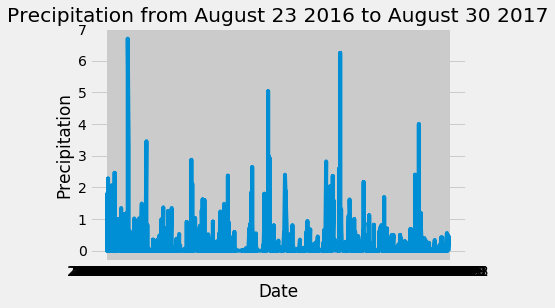

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sorted_df)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation from August 23 2016 to August 30 2017')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('select station, count(id) as count from measurement group by station order by count desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_stat = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
max_stat = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_stat = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'The lowest temperature for station USC00519281 is {min_stat}')
print(f'The highest temperature for station USC00519281 is {max_stat}')
print(f'The average temperature for station USC00519281 is {avg_stat}')

The lowest temperature for station USC00519281 is [(54.0,)]
The highest temperature for station USC00519281 is [(85.0,)]
The average temperature for station USC00519281 is [(71.66378066378067,)]


In [23]:
avg_stat = session.query(Measurement.date,func.avg(Measurement.tobs)).group_by(Measurement.date).all()
print(avg_stat)

[('2010-01-01', 69.71428571428571), ('2010-01-02', 67.0), ('2010-01-03', 74.0), ('2010-01-04', 75.0), ('2010-01-05', 74.5), ('2010-01-06', 73.33333333333333), ('2010-01-07', 70.42857142857143), ('2010-01-08', 65.57142857142857), ('2010-01-09', 68.57142857142857), ('2010-01-10', 72.71428571428571), ('2010-01-11', 66.71428571428571), ('2010-01-12', 61.57142857142857), ('2010-01-13', 61.5), ('2010-01-14', 66.42857142857143), ('2010-01-15', 64.83333333333333), ('2010-01-16', 67.33333333333333), ('2010-01-17', 68.0), ('2010-01-18', 73.0), ('2010-01-19', 69.42857142857143), ('2010-01-20', 67.85714285714286), ('2010-01-21', 69.5), ('2010-01-22', 63.5), ('2010-01-23', 73.83333333333333), ('2010-01-24', 73.16666666666667), ('2010-01-25', 67.14285714285714), ('2010-01-26', 74.71428571428571), ('2010-01-27', 68.71428571428571), ('2010-01-28', 69.83333333333333), ('2010-01-29', 65.8), ('2010-01-30', 70.5), ('2010-01-31', 71.5), ('2010-02-01', 66.5), ('2010-02-02', 66.83333333333333), ('2010-02-03'

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Save the query results as a Pandas DataFrame and set the index to the date column
station_year_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').order_by((Measurement.date).desc()).all()
station_year_data_df = pd.DataFrame(station_year_data,columns=['Date','Tobs'])
station_year_data_df.fillna(value=0,inplace=True)
station_year_data_df
station_sorted_df = station_year_data_df.sort_values(by=['Date'],ascending=True)
station_sorted_df = station_sorted_df.set_index(['Date'])

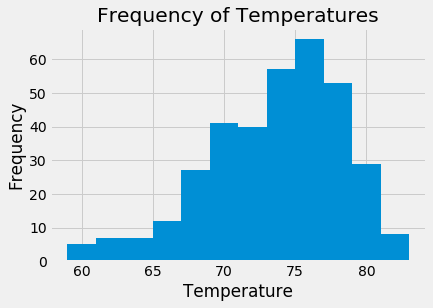

In [25]:
plt.hist(station_sorted_df['Tobs'],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequency of Temperatures')
plt.show()

In [26]:
station_sorted_df

,Tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-02-28', '2012-03-28'))

[(59.0, 69.32718894009217, 75.0)]


In [29]:
# Plot the results from your previous query as a bar chart. 
trip_df = pd.DataFrame(calc_temps('2016-08-23', '2017-08-23'),columns = ['tmin','tavg','tmax'])
trip_df



,tmin,tavg,tmax
0,58.0,74.590583,87.0


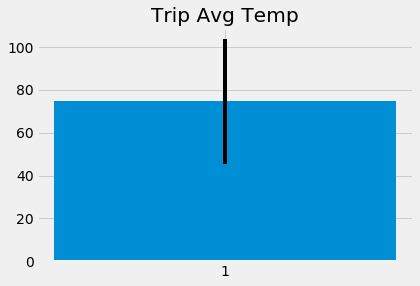

In [30]:
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(1,trip_df['tavg'],yerr=(trip_df['tmax']-trip_df['tmin']))
plt.xticks([1])
plt.title("Trip Avg Temp")
plt.show()

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
rainfall = session.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').group_by(Measurement.station).all()
rainfall
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sort_rainfall = session.query(Measurement.station,func.sum(Measurement.prcp)).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').group_by(Measurement.station).order_by((Measurement.prcp).desc).all()
sort_rainfall


ArgumentError: SQL expression object expected, got object of type <class 'method'> instead

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
